<a href="https://colab.research.google.com/github/tatamiya/blog_artifacts/blob/main/zenn/20230924/%E4%B8%8D%E5%9D%87%E7%AD%89%E3%81%AB%E5%89%B2%E3%82%8A%E6%8C%AF%E3%81%A3%E3%81%9FAB%E3%83%86%E3%82%B9%E3%83%88_Permutation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Permutation Test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html

In [1]:
import numpy as np
from scipy.stats import permutation_test, bernoulli

import matplotlib.pyplot as plt

In [2]:
p_a=0.001
p_b=0.001

sample_size_a = 1000
sample_size_b = 100

In [3]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

# 1度のみの試行例

In [38]:
ber_x_a = bernoulli.rvs(p_a, size=sample_size_a, random_state=13)
ber_x_b = bernoulli.rvs(p_b, size=sample_size_b, random_state=13)

In [39]:
ber_x_a.mean() - ber_x_b.mean()

0.003

In [40]:
res = permutation_test((ber_x_a, ber_x_b), statistic, vectorized=True, alternative='two-sided')
res

PermutationTestResult(statistic=0.003, pvalue=1.0, null_distribution=array([ 0.003,  0.003,  0.003, ...,  0.003,  0.003, -0.008]))

In [41]:
res.pvalue

1.0

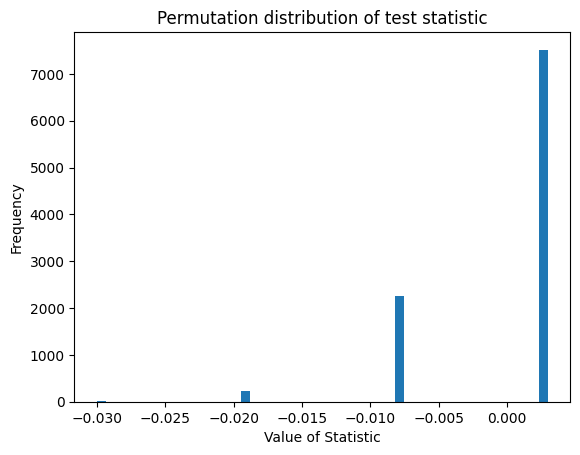

In [21]:
plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()

# 100回試行

In [32]:
num_iter = 100

ber_x_a = bernoulli.rvs(p_a, size=(sample_size_a, num_iter), random_state=13)
ber_x_b = bernoulli.rvs(p_b, size=(sample_size_b, num_iter), random_state=13)

In [33]:
ber_x_a.mean(0) - ber_x_b.mean(0)

array([ 0.001,  0.   ,  0.002,  0.   ,  0.   ,  0.   ,  0.001,  0.   ,
        0.   ,  0.002,  0.   , -0.008, -0.009,  0.001,  0.003,  0.001,
        0.001,  0.001,  0.   ,  0.   ,  0.   ,  0.001,  0.001,  0.001,
        0.001,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.001,  0.   ,
        0.001,  0.001, -0.009,  0.   ,  0.001,  0.003, -0.018,  0.   ,
        0.001,  0.   ,  0.001,  0.001,  0.   ,  0.   ,  0.002,  0.004,
        0.001,  0.   ,  0.   ,  0.001,  0.   ,  0.   ,  0.   ,  0.003,
        0.   ,  0.   ,  0.001,  0.001,  0.004,  0.   ,  0.   ,  0.002,
        0.002,  0.001,  0.   ,  0.001,  0.   ,  0.   ,  0.002,  0.   ,
        0.   ,  0.   ,  0.001,  0.   ,  0.001,  0.001,  0.001,  0.   ,
        0.003,  0.001,  0.   ,  0.003, -0.007,  0.001, -0.008,  0.001,
        0.001,  0.   ,  0.   ,  0.   ,  0.002,  0.001,  0.001, -0.008,
       -0.008,  0.003,  0.001,  0.   ])

In [34]:
res = permutation_test((ber_x_a, ber_x_b), statistic, vectorized=True, alternative='two-sided')
res

PermutationTestResult(statistic=array([ 0.001,  0.   ,  0.002,  0.   ,  0.   ,  0.   ,  0.001,  0.   ,
        0.   ,  0.002,  0.   , -0.008, -0.009,  0.001,  0.003,  0.001,
        0.001,  0.001,  0.   ,  0.   ,  0.   ,  0.001,  0.001,  0.001,
        0.001,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.001,  0.   ,
        0.001,  0.001, -0.009,  0.   ,  0.001,  0.003, -0.018,  0.   ,
        0.001,  0.   ,  0.001,  0.001,  0.   ,  0.   ,  0.002,  0.004,
        0.001,  0.   ,  0.   ,  0.001,  0.   ,  0.   ,  0.   ,  0.003,
        0.   ,  0.   ,  0.001,  0.001,  0.004,  0.   ,  0.   ,  0.002,
        0.002,  0.001,  0.   ,  0.001,  0.   ,  0.   ,  0.002,  0.   ,
        0.   ,  0.   ,  0.001,  0.   ,  0.001,  0.001,  0.001,  0.   ,
        0.003,  0.001,  0.   ,  0.003, -0.007,  0.001, -0.008,  0.001,
        0.001,  0.   ,  0.   ,  0.   ,  0.002,  0.001,  0.001, -0.008,
       -0.008,  0.003,  0.001,  0.   ]), pvalue=array([1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.   

In [35]:
# 100回の試行の中で、「有意差あり」と判断が出たケースがどれだけあったかを調べる
(res.pvalue < 0.05).mean()

0.0